In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


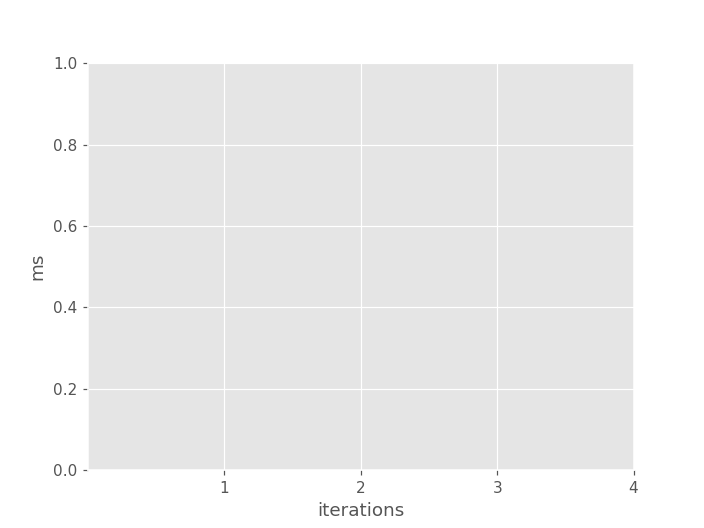

Domain gave error on pinging


In [4]:
NUMBER_OF_PINGS = 4

text = widgets.Text(description="Domain to ping", width=200)
display(text)

data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

button = widgets.Button(description="Update the graph")


def handle_submit(sender):
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
        data[text.value] = hits
        data[text.value] = data[text.value].astype(float)
        plots[text.value], = ax.plot(x, data[text.value], label=text.value)
        plt.legend()
        plt.draw()
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) ==1:
            display(button)
      
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots[c.description].set_visible(False)
        else:
            plots[c.description].set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()